# Instrucciones

Se muestra a continuación dos secciones que son:<br><br>
-Instalación de la librería QuTip<br>
-Programa del ejemplo 10.2

# Instalación de la librería QuTip
<br>
<br>
Es necesario tener instalado la librería para poder ejecutar cada una de las funciones y clases que se hacen uso.Antes de comenzar con la instalación se tiene que asegurar tener instalado la versión más reciente de python (3.6 en adelante), numpy (1.16+ en adelante) y SciPy (1.0+ en adelante).
<br>
<br>
Para comenzar con la instalación de la librería se tiene que tener abierto CMD.exe prompt que se encuentra dentro de Anaconda Navigator:<br>

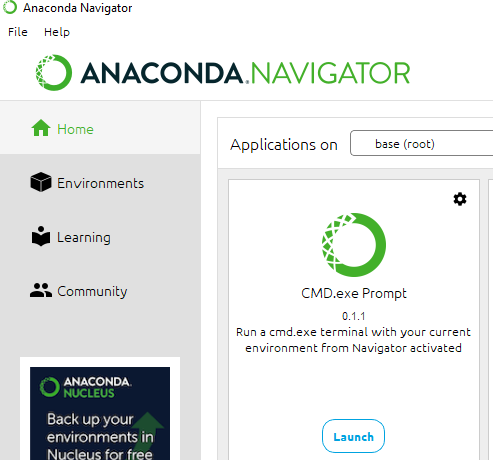

<br>
<br>
Desplegará la ventana de CMD.exe prompt, dentro se tendrá que ingresar el siguiente comando:<br><br>
<b>pip install qutip</b> o <b>conda install qutip</b>

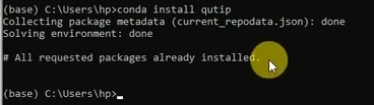<br><br>
Una vez hecho lo anterior se puede iniciar con la ejecución del programa que se muestra a continuación.

# Programa del ejemplo 10.2

Se realizará un ejemplo del funcionamiento del programa.

Las librerías que se utilizaron son: QutTip, numpy y math.<br>
La librería QuTip es importante en este programa ya es la que nos permite realizar ciertas operaciones que son necesarias este programa (densidad, producto tensor y la transposición parcial). Es importante esta librería ya que nos permite simular qubits lo cual sera fundamental para la realización del programa.<br>
<br>
La librería numpy es utilizado para poder manipular ciertos arreglos que son necesarios para la realización de ciertas operaciones, y también el poder encontrar los eigenvalores.

In [4]:
from qutip import *
import numpy as np
from numpy.linalg import eig
import math

Se pide al usuario el ingreso de los signos correspondientes a los estados |00>, |01>, |10> y |11> que pueden ser signos positivos o negativos.<br>
Conforme vaya ingresando los signos se realizara la concatenación entre el signo ingresado y el número 1.

In [51]:
sig_1 = ""
sig_2 = ""
sig_3 = ""
sig_4 = ""
sig_1 = input("Signo (+ ó -) para |00>: ")
sig_1 = sig_1 + "1"
sig_2 = input("Signo (+ ó -) para |01>: ")
sig_2 = sig_2 + "1"
sig_3 = input("Signo (+ ó -) para |10>: ")
sig_3 = sig_3 + "1"
sig_4 = input("Signo (+ ó -) para |11>: ")
sig_4 = sig_4 + "1"

Signo (+ ó -) para |00>: +
Signo (+ ó -) para |01>: -
Signo (+ ó -) para |10>: -
Signo (+ ó -) para |11>: +


Se crean las variables para almacenar los números con su signo correspondiente.<br>
Con los datos ingresados por el usuario, se asignan los signos correspondientes a cada estado.

In [52]:
ket_1 = 0
ket_2 = 0
ket_3 = 0
ket_4 = 0
ket_1 = int(sig_1) #Se hará un casteo para almacenar el número 1 con el signo (+ o -) dado por el usuario.
ket_2 = int(sig_2)
ket_3 = int(sig_3)
ket_4 = int(sig_4)

1 -1 -1 1


Se utiliza la clase Qobj() de la librería QuTip para la creación del estado que almacenará los qubits |00>, |01>, |10> y |11>.<br>
Se aplican dos clases al estado que son dag() y unit().<br>
<br>
dag() se usa para aplicar el operador adjunto.<br>
unit() regresa el estado normalizado.

In [53]:
state = Qobj([[ket_1,ket_2,ket_3,ket_4]],dims=[[2, 2], [2, 2]]) #Se creara el estado.
state = state.dag()
state = state.unit() #Para apegarnos al ejemplo del libro, se aplica la función unit para normalizar el estado.
print(state)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 1), type = oper, isherm = False
Qobj data =
[[ 0.49999999]
 [-0.49999999]
 [-0.49999999]
 [ 0.49999999]]


Se realiza la operación correspondiente para obtener la densidad:<br>
$\rho = |\psi><\psi|$

In [54]:
state_density = state * state.dag()
state_density

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.24999999 -0.24999999 -0.24999999  0.24999999]
 [-0.24999999  0.24999999  0.24999999 -0.24999999]
 [-0.24999999  0.24999999  0.24999999 -0.24999999]
 [ 0.24999999 -0.24999999 -0.24999999  0.24999999]]

Posteriormente se encuentra la transposición parcial.

In [55]:
state_partial_transpose = partial_transpose(state_density, [0,1])
state_partial_transpose

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.24999999 -0.24999999 -0.24999999  0.24999999]
 [-0.24999999  0.24999999  0.24999999 -0.24999999]
 [-0.24999999  0.24999999  0.24999999 -0.24999999]
 [ 0.24999999 -0.24999999 -0.24999999  0.24999999]]

Para la búsqueda de los eigenvalores es necesario tener que configurar la variable que almacena el resultado de la transposición parcial, para ello tendremos que castear el objeto para obtener un arreglo. Al momento de ejecutarlo nos mandará una advertencia que no afecta la ejecución del programa.

In [56]:
state_arr = np.stack(state_partial_transpose).astype(None)
state_arr

<ipython-input-56-738ac6adf8b0>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  state_arr = np.stack(state_partial_transpose).astype(None)


array([[[ 0.24999999, -0.24999999, -0.24999999,  0.24999999]],

       [[-0.24999999,  0.24999999,  0.24999999, -0.24999999]],

       [[-0.24999999,  0.24999999,  0.24999999, -0.24999999]],

       [[ 0.24999999, -0.24999999, -0.24999999,  0.24999999]]])

Una vez realizado se usará reshape() para convertir el arreglo 3x3 numpy en un arreglo 2x2

In [57]:
state_arr_conv = state_arr.reshape(4,2*2)

Después, como se observó anteriormente las variables no tienen el valor almacenado hasta 2 decimales, por lo que se aplicará la clase around() para el redondeo poniendo como limite hasta 0.00.<br>
<br>
Es importante realizar el redondeo por que al no hacerlo afectará en obtener los eigenvalores más adelante, dándonos resultados con varios decimales y no acordes al ejemplo del libro.


In [58]:
state_around = np.around(state_arr_conv,decimals=2)

Una vez realizado los pasos anteriores, se realiza la búsqueda de los eigenvalores de la matriz.

In [59]:
w,v=eig(state_around)
print('Eigenvalores:', w)

Eigenvalores: [0. 1. 0. 0.]


Con los eigenvalores obtenidos se aplica la condición de transposición parcial de Peres.

In [60]:
count = 0
for x in w:
    if x >= 0:
        count+=1
if count == len(w):
    print("Aplicando la condición de transposición parcial de Peres, los eigenvalores son mayores o iguales a 0,\nentonces es un estado separable.")
else:
    print("Aplicando la condición de transposición parcial de Peres, hay algún eigenvalor negativo,\nentonces es un estado entrelazado (entangled)")

Aplicando la condición de transposición parcial de Peres, los eigenvalores son mayores o iguales a 0,
entonces es un estado separable.
